In [37]:
pip install factor-analyzer

Note: you may need to restart the kernel to use updated packages.


In [38]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.decomposition import FactorAnalysis

### Implementing PCA

In [39]:
data = pd.read_csv("imputed_data_Economic.csv")
numeric_data = data.drop(columns=['Country', 'Year'])
numeric_data = numeric_data.dropna()

numeric_data_standardized = (numeric_data - numeric_data.mean()) / numeric_data.std()

In [40]:
data.head()

,Year,Country,Inflation_Rate,GDP_Per_Capita,GDP_Growth_Rate,Unemployment_Rate,Cost of Living Index,Local Purchasing Power Index
0,1970,Africa Eastern and Southern,10.328049,253.382370,1.137276,5.175244,32.637046,27.920171
1,1970,Africa Western and Central,4.635119,219.865368,17.566412,4.103713,39.186194,29.333842
2,1970,Arab World,5.656457,351.870854,22.320438,4.089240,39.112031,30.445710
3,1970,Argentina,23.317391,7948.212149,3.045643,5.117697,41.855355,36.705539
4,1970,Australia,3.439153,3304.837820,7.175799,3.839744,42.710569,32.335829


In [48]:
numeric_data_standardized.head()

,Inflation_Rate,GDP_Per_Capita,GDP_Growth_Rate,Unemployment_Rate,Cost of Living Index,Local Purchasing Power Index
0,-0.039104,-0.537554,-0.395453,-0.282355,-0.889006,-0.559810
1,-0.058029,-0.539963,2.184315,-0.552798,-0.402080,-0.489831
2,-0.054634,-0.530474,2.930812,-0.556450,-0.407594,-0.434792
3,0.004075,0.015615,-0.095794,-0.296879,-0.203629,-0.124920
4,-0.062004,-0.318189,0.552740,-0.619420,-0.140044,-0.341228


In [31]:
pca = PCA()
pca.fit(numeric_data_standardized)

explained_variance_ratio = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

for i, var in enumerate(explained_variance_ratio, start=1):
    print(f"PC{i}: {var * 100:.2f}% variance explained")

PC1: 44.69% variance explained
PC2: 18.30% variance explained
PC3: 16.72% variance explained
PC4: 15.05% variance explained
PC5: 3.55% variance explained
PC6: 1.69% variance explained


### Factor Analysis

In [32]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numeric_data)

kmo_all,kmo_model=calculate_kmo(df_scaled)
kmo_model

0.7123334687790926

In [33]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.fit(df_scaled)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

D:\Users\57176\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


array([2.68139571, 1.09828197, 1.00339167, 0.90285566, 0.21295858,
       0.10111642])

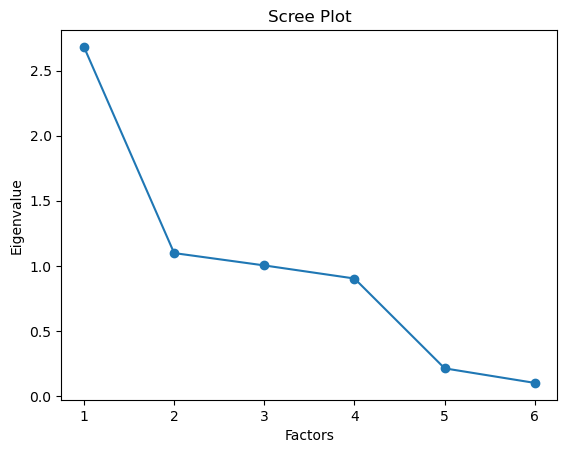

In [34]:
import matplotlib.pyplot as plt
plt.scatter(range(1,df_scaled.shape[1]+1),eigen_values)
plt.plot(range(1,df_scaled.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.show()

In [53]:
from factor_analyzer import FactorAnalyzer
# 因子分析（假设提取2个因子）
fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(numeric_data_standardized)

# 获取载荷矩阵
loadings = pd.DataFrame(
    fa.loadings_,
    index=numeric_data_standardized.columns,
    columns=['Factor1', 'Factor2']
)
print("载荷矩阵：\n", loadings)

载荷矩阵：
                                Factor1   Factor2
Inflation_Rate               -0.023249  0.004989
GDP_Per_Capita                0.973022  0.124369
GDP_Growth_Rate              -0.041886 -0.116676
Unemployment_Rate            -0.094547  0.733210
Cost of Living Index          0.867807  0.106040
Local Purchasing Power Index  0.861288  0.276010


D:\Users\57176\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [47]:
columns_for_fa = [
    'Inflation_Rate','GDP_Per_Capita','GDP_Growth_Rate','Unemployment_Rate','Cost of Living Index',
    'Local Purchasing Power Index'
]
data = data.dropna()
data_filled = data[columns_for_fa]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filled)

fa = FactorAnalysis(n_components=1)

factor_scores = fa.fit_transform(data_scaled)

data['Economic_Index_FA'] = factor_scores.round(3)

pca = PCA(n_components=1)
pca_scores = pca.fit_transform(data_scaled)
data['Economic_Index_PCA'] = pca_scores.round(3)

data.to_csv("Economic_Index.csv",index=False)

In [50]:
numeric_data_standardized.head()

,Inflation_Rate,GDP_Per_Capita,GDP_Growth_Rate,Unemployment_Rate,Cost of Living Index,Local Purchasing Power Index
0,-0.039104,-0.537554,-0.395453,-0.282355,-0.889006,-0.559810
1,-0.058029,-0.539963,2.184315,-0.552798,-0.402080,-0.489831
2,-0.054634,-0.530474,2.930812,-0.556450,-0.407594,-0.434792
3,0.004075,0.015615,-0.095794,-0.296879,-0.203629,-0.124920
4,-0.062004,-0.318189,0.552740,-0.619420,-0.140044,-0.341228
